# 2 Data Wrangling - for Top Video Game Review Analysis


## Contents
* 2 Data Wrangling - for Top Video Game Review Analysis
  * 2.1 Imports
  * 2.2 Load Video Game Review Dataset (vgr_data)
  * 2.3 Exploring The Video Game Review Dataset (vgr_data)
    * 2.3.1 Looking at Random game in video game review dataset
    * 2.3.2 Number Of Missing Values By Column
    * 2.3.3 Categorical Features of  Video Game Review Dataset
      * 2.3.3.1 Unique platform features
  * 2.4 Cleaning and Fixing VGR Dataset
    * 2.4.1 Looking at missing values in 'summary' column
  



## Introduction<a id='2.2_Introduction'></a>

[Link](https://www.kaggle.com/deepcontractor/top-video-games-19952021-metacritic) Game reviews are very personal to user experiences but what interests me is if there are any similarities between game summaries, and how well they perform based on user/metacritic reviews. We will also look into how many consules are in the dataset, are there any cult classics in the top video games, are there any genres of games, can we see any trends?

So this project is also going to test if I can create a best-selling game, based on reviews/performances of best-selling games in the past.

People who love video games and grew up with certain classics have probably played one of theses games at some point.

## 2.1 Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from pandas_profiling import ProfileReport #jeff suggestion
from sklearn.preprocessing import LabelEncoder
import plotly as py
#from library.sb_utils import save_file

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.2 Load Video Game Review Dataset (vgr_data)

In [2]:
# the supplied CSV data file is the raw_data directory
vgr_data = pd.read_csv('../raw_data/all_games.csv', na_values=['tbd'])

In [3]:
#What is the shape of this dataset?
vgr_data.shape

(18800, 6)

We have 18,800 rows and 6 columns.

In [4]:
#Call the info method to see a summary of the data
vgr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18800 non-null  object 
 1   platform      18800 non-null  object 
 2   release_date  18800 non-null  object 
 3   summary       18686 non-null  object 
 4   meta_score    18800 non-null  int64  
 5   user_review   17435 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 881.4+ KB


`name` is the name of the video game.
`platform` is which console the game is played on
The other columns are when the game was released, their summary, and what score the website gave as a review, as well as the user review of that game.

I wonder if user_review and the professional reviews(meta_score)match up?

In [5]:
vgr_data.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


We can see the full name of each game, and see that the meta-score is possible based on a score out of 100 points, where as the user_review is possible out of 10 points.

We see that the release data is a date time object, and the summaries are pretty long 'str' objects. It will be interesting to see what are in some of these summaries.

## 2.3 Exploring The Video Game Review Dataset (vgr_data)

### 2.3.1 Looking at Random game in video game review dataset

In [6]:
#Since we know the shape is 18,800 entries with 6 columns, 
#lets pick a random number between 0 - 18,800
import random
x = random.randint(0, 18800)
x

3262

In [7]:
#Lets look at just one game to see what it would look like.
vgr_data.iloc[x]

name                                The Vanishing of Ethan Carter
platform                                                       PC
release_date                                   September 25, 2014
summary         The Vanishing of Ethan Carter is a first-perso...
meta_score                                                     82
user_review                                                   8.0
Name: 3262, dtype: object

### 2.3.2 Number Of Missing Values By Column

The video game review dataset doesn't appear to have any missing values, but lets look by counting the number of missing values in each column and sort them.

In [8]:
missing = pd.concat([vgr_data.isnull().sum(), 100 * vgr_data.isnull().mean()], axis=1)

missing.columns=['count', '%']

missing.sort_values(by= 'count')

#another way vgr_data.isnull().sum()

,count,%
name,0,0.000000
platform,0,0.000000
release_date,0,0.000000
meta_score,0,0.000000
summary,114,0.606383
user_review,1365,7.260638


`summary` column has missing values, at 114/18800 or 0.6% a total of 114 rows have missing values.

Having a video game summary is very important because it tells us what the object of the game is and gives us a general clue as to what type of genre it is. Since it is a categorical feature, I can't just find the average for a column that had numerical values.

Can I find summaries for the missing summaries?

and `user_review` column has missing values, at 1365/18800 or 7.3% a total of 1365 rows have missing values.
This could be a significant downer on our values for that column.

We might be able to find the relationship between the meta_score and the user reivew in order to insert values for the missing values in this column. 
OR we could get the average for the user_review column to insert values for missing values.

### 2.3.3 Categorical Features of Video Game Review Dataset

Now we inspect categorical features of the healthcare dataset, of which there are many: `name` , `platform`, `release_date` and `summary` . 

In [9]:
vgr_data.select_dtypes(include='object')

,name,platform,release_date,summary
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ..."
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi..."
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...
...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by..."
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ..."


Of the 6 columns of data that vgr_data has, 5 columns are categorical features.

Are there any problems with these columns? Are all of them unique?

* Are the names of the video games ALWAYS unique?
* What are the unique consoles? (platform)

Why is `user_review` an object and not a float?

We need to change that.

#### 2.3.3.1 Unique `platform` features

In [10]:
vgr_data['platform'].value_counts()

 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64

This is very interesting to find that there are only 22 different platforms to play video games on when there are in fact SO MANY MORE.


If you look at this [list](https://en.wikipedia.org/wiki/Lists_of_video_game_consoles) of video game consoles (aka `platforms`) you will see an entire range of ways to play. From hand-held consoles to dedicated video game consoles.

I don't believe that there should be such a limited range of platforms for this list. This is the top-rated video games from 1995 - 2021 and should include far more.

## 2.4 Cleaning and Fixing VGR Dataset

### 2.4.1 Looking at missing values in 'summary' column

In [11]:
#Need to find the names of the games who have missing values in the summary column

vgr_data[vgr_data.summary.isnull()]

#leave them in, until you need that summary field.

,name,platform,release_date,summary,meta_score,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",NaN,88,7.6
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,NaN
1535,Mini Metro,Switch,"August 30, 2018",NaN,86,8.4
1649,Out of the Park Baseball 13,PC,"April 9, 2012",NaN,85,7.8
2427,Guild Wars 2: Path of Fire,PC,"September 22, 2017",NaN,83,7.3
...,...,...,...,...,...,...
17999,One Piece: Unlimited Cruise SP,PlayStation 4,"February 10, 2012",NaN,46,7.0
18134,AeternoBlade II,Wii U,"October 11, 2019",NaN,44,4.4
18253,Surgeon Simulator: Experience Reality,PlayStation 4,"December 3, 2016",NaN,43,4.3
18532,The Ripping Friends,Game Boy Advance,"March 24, 2002",NaN,38,NaN


In [12]:
#remove 'tbd: under user_reviews

In [13]:
vgr_data.isnull().sum()

name               0
platform           0
release_date       0
summary          114
meta_score         0
user_review     1365
dtype: int64

In [14]:
#JEFF NOTES TO DO

#EDA, do first BEFORE string analysis in 'Summary' section

#remove most frequent, english 'STOP' words
#text preprocessing
#define lists

#modeling - do the genre and score prediction

### 2.4.2 Change `user_review` to numerical, instead of object.

In [15]:
vgr_data['user_review'] = pd.to_numeric(vgr_data['user_review'])

In [16]:
vgr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18800 non-null  object 
 1   platform      18800 non-null  object 
 2   release_date  18800 non-null  object 
 3   summary       18686 non-null  object 
 4   meta_score    18800 non-null  int64  
 5   user_review   17435 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 881.4+ KB


## 2.5 EDA on Video Game Reviews

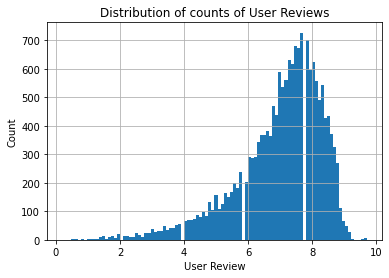

In [17]:
#still have missing values in `user_review` but lets do some EDA with these values
vgr_data.user_review.hist(bins=100)
plt.xlabel('User Review')
plt.ylabel('Count')
plt.title('Distribution of counts of User Reviews')
plt.savefig("../images/user_reviews_counts_hist.png");

This is an interesting distribution mostly ranges from a score of 6 to a score of 9.

Lets look at the meta_score distribution next

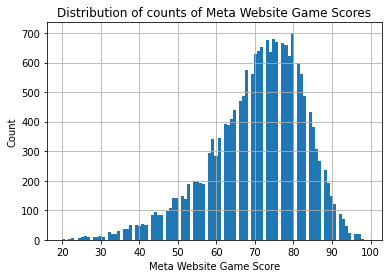

In [18]:
#still have missing values in `user_review` but lets do some EDA with these values
vgr_data.meta_score.hist(bins=100)
plt.xlabel('Meta Website Game Score')
plt.ylabel('Count')
plt.title('Distribution of counts of Meta Website Game Scores')
plt.savefig("../images/meta_score_counts_hist.png");

Looks like the most ditribution is between a score of 50 through a score of 90.

I forgot that `meta_score` and `user_review` were based off of DIFFERENT rating systems.

We need to look into this further, and see what the website says they rate the games based off of.

In [19]:
#Notes with Jeff
#EDA, meta_critic reviews gone up overtime?
#average score by gaming system,                          = bar graph?
#strong correlation b/w experts (meta) vrs user_reviews?? = scatterplot


#modeling
#topic model, run on the dataset, FPS, Sports, Etc. See if those pop up in topic modeling(strings in summary)
#back into genre stuff, jeff can send article about, and link 
#topic modeling easier

#string analysis in 'Summary' section
#word frequency, similar to clustering exercises.




In [20]:
#lets look at the correlation of the dataset, in this case we onl have 2 numerical columns to work with
#meta_score and user_review
vgr_data.corr()

,meta_score,user_review
meta_score,1.00000,0.52626
user_review,0.52626,1.00000


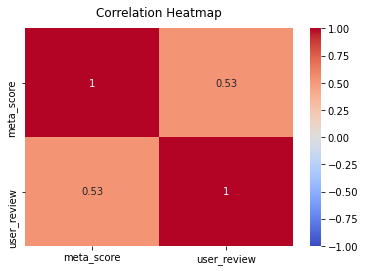

In [21]:
#looks like there is only a 50% correlation with `user_review` versus `meta_score`
#lets plot the heatmap for features
heatmap = sns.heatmap(vgr_data.corr(), vmin=-1, vmax=1, annot=True, cmap= 'coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig("../images/correlation-heatmap.png");


In [22]:
#finding the average user_review score dependent on the console
# how???
vgr_data['platform'].value_counts()

 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64

In [23]:
#Getting the average user_review based on a console(platform)
user_console = vgr_data.groupby('platform', as_index=False)['user_review'].mean()
user_console

,platform,user_review
0,3DS,7.103968
1,DS,7.126878
2,Dreamcast,7.870588
3,Game Boy Advance,7.467049
4,GameCube,7.430751
5,Nintendo 64,7.954930
6,PC,6.918197
7,PSP,7.267888
8,PlayStation,7.722289
9,PlayStation 2,7.532494


In [25]:
#Getting the average meta_score review based on a console(platform)
meta_console = vgr_data.groupby('platform', as_index=False)['meta_score'].mean()
meta_console

,platform,meta_score
0,3DS,69.626263
1,DS,66.679167
2,Dreamcast,74.072000
3,Game Boy Advance,68.621005
4,GameCube,70.953125
5,Nintendo 64,78.436620
6,PC,71.797903
7,PSP,68.542969
8,PlayStation,73.342246
9,PlayStation 2,68.946959


<AxesSubplot:title={'center':'Average Review based on Platform'}, xlabel='Platform(Console) Game is played on', ylabel='Average User Review'>

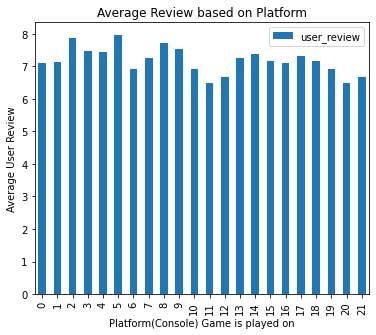

In [26]:
user_console.plot(kind='bar', title='Average Review based on Platform', ylabel='Average User Review', 
                  xlabel='Platform(Console) Game is played on', figsize=(6,5))

#dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         #xlabel='Home Team', figsize=(6, 5))

In [38]:
import plotly.express as px
#user_plat = px.data.gapminder()
fig = px.bar(user_console, x='user_review', y='platform', color='platform')
fig.show()

In [39]:
fig = px.bar(meta_console, x='meta_score', y='platform', color='platform')
fig.show()
#both meta_score and user_review Nintendo 64 have the highest reviewed games.

In [36]:
#scatter plot to see correlation between user_review and meta_score

#df = px.data.iris()
fig = px.scatter(vgr_data, x="meta_score", y="user_review", color='user_review')
fig.show()
